In [ ]:
#importing libraries
import pandas as pd,numpy as np

#Visualization libs
import matplotlib.pyplot as plt

#to produce the visualizations in the same window and not a new window.
%matplotlib inline       

import seaborn as sn
import plotly.express as px
import plotly.graph_objects as go
import folium        #to populate maps and geographical data
from folium import plugins

#Setting the default fig size
plt.rcParams['figure.figsize']=10,12

# #Disable warnings
# import warnings
# warnings.filterwarnings('ignore')


## Analysing cases in India

In [ ]:
#Loading India dataset
current_dir='/content/drive/MyDrive/COVID 19 ML Model Data-20210218T144742Z-001/COVID 19 ML Model Data'
df=pd.read_excel(current_dir+'/Covid cases in India.xlsx',sheet_name='Sheet1')

In [ ]:
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1
5,6,Haryana,14,14,11,0
6,7,Himachal Pradesh,3,0,0,1
7,8,Karnataka,41,0,3,1
8,9,Kerala,101,8,4,0
9,10,Madhya Pradesh,9,0,0,0


In [ ]:
df_india=df.copy()

In [ ]:
#Coordinates of the Indian States and Union Territories
india_coord=pd.read_excel(current_dir+'/Indian Coordinates.xlsx')

#Day to day data of other Countries(for comparison)
dtd_india=pd.read_excel(current_dir+'/per_day_cases.xlsx',sheet_name='India')
dtd_italy=pd.read_excel(current_dir+'/per_day_cases.xlsx',sheet_name='Italy')
dtd_korea=pd.read_excel(current_dir+'/per_day_cases.xlsx',sheet_name='Korea')
dtd_wuhan=pd.read_excel(current_dir+'/per_day_cases.xlsx',sheet_name='Wuhan')


In [ ]:
dtd_india.head(10)

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN
5,2020-02-04,3,0,NaN
6,2020-02-05,3,0,NaN
7,2020-02-06,3,0,NaN
8,2020-02-07,3,0,NaN
9,2020-02-08,3,0,NaN


In [ ]:
#Creating a column total cases which is a sum of foreign national cases and indian national cases.
#df.drop(['S. No.'],axis=1,inplace=True)

df['Total cases']=df['Total Confirmed cases ( Foreign National )']+df['Total Confirmed cases (Indian National)']
total_cases=df['Total cases'].sum()
print('Total number of cases confirmed cases across till date (2nd March,2020): ',total_cases)

Total number of cases confirmed cases across till date (2nd March,2020):  562


In [ ]:
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,1,Andhra Pradesh,9,0,0,0,9
1,2,Bihar,3,0,0,1,3
2,3,Chhattisgarh,1,0,0,0,1
3,4,Delhi,30,1,6,1,31
4,5,Gujarat,32,1,0,1,33
5,6,Haryana,14,14,11,0,28
6,7,Himachal Pradesh,3,0,0,1,3
7,8,Karnataka,41,0,3,1,41
8,9,Kerala,101,8,4,0,109
9,10,Madhya Pradesh,9,0,0,0,9


In [ ]:
#Calculating Total active cases (i.e total cases - (death+cured))
df['Total active']=df['Total cases']-df['Cured']+df['Death']
total_active=df['Total active'].sum()
print('Total number of active cases : ',total_active)

Total number of active cases :  530


In [ ]:
#Highlighting the dataframe
df.style.background_gradient(cmap='Reds')

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases,Total active
0,1,Andhra Pradesh,9,0,0,0,9,9
1,2,Bihar,3,0,0,1,3,4
2,3,Chhattisgarh,1,0,0,0,1,1
3,4,Delhi,30,1,6,1,31,26
4,5,Gujarat,32,1,0,1,33,34
5,6,Haryana,14,14,11,0,28,17
6,7,Himachal Pradesh,3,0,0,1,3,4
7,8,Karnataka,41,0,3,1,41,39
8,9,Kerala,101,8,4,0,109,105
9,10,Madhya Pradesh,9,0,0,0,9,9


In [ ]:
Total_Cases=df.groupby('Name of State / UT')['Total cases'].sum().sort_values(ascending=False).to_frame()  #to_frame() is used to convert the series to dataframe

Total_Cases.style.background_gradient(cmap='Reds')


,Total cases
Name of State / UT,
Kerala,109
Maharashtra,101
Karnataka,41
Uttar Pradesh,35
Telengana,35
Gujarat,33
Rajasthan,32
Delhi,31
Punjab,29


### Visualizing the spread geographically




In [ ]:
#Using folium to create zoomable map
df_full=pd.merge(india_coord,df,on='Name of State / UT')   #Merge based on the column state/ut....
df_full

,Name of State / UT,Latitude,Longitude,S. No.,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases,Total active
0,Andhra Pradesh,14.750429,78.570026,1,9,0,0,0,9,9
1,Delhi,28.669993,77.230004,4,30,1,6,1,31,26
2,Haryana,28.450006,77.019991,6,14,14,11,0,28,17
3,Karnataka,12.570381,76.919997,8,41,0,3,1,41,39
4,Kerala,8.900373,76.569993,9,101,8,4,0,109,105
5,Maharashtra,19.250232,73.160175,11,98,3,0,2,101,103
6,Punjab,31.519974,75.980003,16,29,0,0,1,29,30
7,Rajasthan,26.449999,74.639981,17,30,2,3,0,32,29
8,Telengana,18.112400,79.019300,19,25,10,1,0,35,34
9,Tamil Nadu,12.920386,79.150042,18,16,2,1,0,18,17


In [ ]:
# for index,row_values in df_full.iterrows():         #row wise
#   print(i,row)

# o/p
# 0 Name of State / UT                            Andhra Pradesh
# Latitude                                             14.7504
# Longitude                                              78.57
# Total Confirmed cases (Indian National)                    9
# Total Confirmed cases ( Foreign National )                 0
# Cured                                                      0
# Death                                                      0
# Total cases                                                9
# Total active                                               9
# Name: 0, dtype: object
# 1 Name of State / UT                            Delhi
# Latitude                                      28.67
# Longitude                                     77.23
# Total Confirmed cases (Indian National)          30
# Total Confirmed cases ( Foreign National )        1
# Cured                                             6
# Death                                             1
# Total cases                                      31
# Total active                                     26

In [ ]:
# for column_name,colum_values in df_full.items():       #goes column wise
#   print(column_name,colum_values)

# Name of State / UT 0     Andhra Pradesh
# 1              Delhi
# 2            Haryana
# 3          Karnataka
# 4             Kerala
# 5        Maharashtra
# 6             Punjab
# 7          Rajasthan
# 8          Telengana
# 9         Tamil Nadu
# 10     Uttar Pradesh
# 11       Uttarakhand
# Name: Name of State / UT, dtype: object
# Latitude 0     14.750429
# 1     28.669993
# 2     28.450006
# 3     12.570381
# 4      8.900373
# 5     19.250232
# 6     31.519974
# 7     26.449999
# 8     18.112400
# 9     12.920386
# 10    27.599981
# 11    30.320409
# Name: Latitude, dtype: float64  

In [ ]:
for index,rows in df_full.iterrows():
  print(rows['Latitude'],rows['Name of State / UT'])

14.7504291 Andhra Pradesh
28.6699929 Delhi
28.45000633 Haryana
12.57038129 Karnataka
8.900372741 Kerala
19.25023195 Maharashtra
31.51997398 Punjab
26.44999921 Rajasthan
18.1124 Telengana
12.92038576 Tamil Nadu
27.59998069 Uttar Pradesh
30.32040895 Uttarakhand


In [ ]:
center = [20.5937, 78.9629]     #coordinates(lat,long) India
map_india = folium.Map(location=center, zoom_start=5,tiles='Stamenterrain')    #setting up the map
#display map
map_india

In [ ]:
for index, rows in df_full.iterrows():
    location = [rows['Latitude'], rows['Longitude']]
    folium.CircleMarker(location,radius=rows['Total cases']*0.6 ,popup ='<strong>State:</strong>'+rows['Name of State / UT']
                  +'\n<strong>TotalCases:</strong>'+str(rows['Total cases'])
                  +'\n<strong>TotalActive:</strong>'+str(rows['Total active']),
                  color='red',fill=True).add_to(map_india)       #filling the cirle with red color

#display the map
map_india
map_india.save('map.html')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



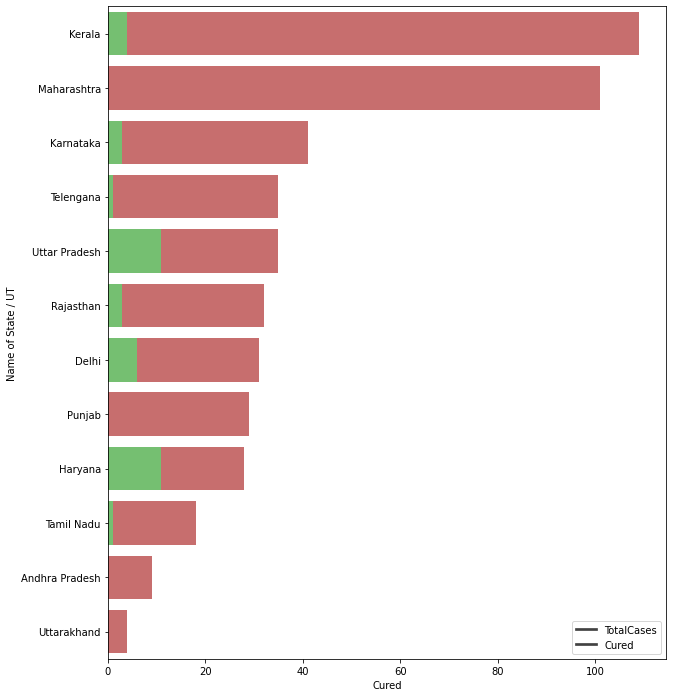

In [ ]:
#Using seaborn for visualization

data=df_full[['Name of State / UT','Total cases','Cured','Death']]
data.sort_values('Total cases',ascending=False,inplace=True)
sn.set_color_codes('muted')
sn.barplot(x='Total cases',y='Name of State / UT',data=data,color='r')
sn.barplot(x='Cured',y='Name of State / UT',data=data,color='g')

#adding legends
plt.legend(labels=['TotalCases','Cured'])

plt.show()

In [ ]:
#Required for plotly to work with colab
import plotly
plotly.io.renderers.default='colab'

In [ ]:
#Plotting interactive graphs using plotly
#Rise in cases
fig=go.Figure()
fig.add_trace(go.Scatter(x=dtd_india['Date'],y=dtd_india['Total Cases'],mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Covid19 in India(Cummulative Cases)',plot_bgcolor='rgb(230,230,230)')
fig.show()


#New covid cases reported daily

fig=px.bar(dtd_india,x='Date',y='New Cases',barmode='group')
fig.update_layout(title_text='Trend of new covid cases in India',plot_bgcolor='rgb(230,230,230)')
fig.show()

### Cummulative cases in India,Italy,S.Korea and Wuhan

In [ ]:

#India
fig=px.bar(dtd_india,x='Date',y='Total Cases',title='Confirmed cases in India',height=600,color='Total Cases',color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

#Italy
fig=px.bar(dtd_italy,x='Date',y='Total Cases',title='Confirmed cases in Italy',height=600,color='Total Cases',color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

#Korea
fig=px.bar(dtd_korea,x='Date',y='Total Cases',title='Confirmed cases in Korea',height=600,color='Total Cases',color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

#Wuhan
fig=px.bar(dtd_wuhan,x='Date',y='Total Cases',title='Confirmed cases in Wuhan',height=600,color='Total Cases',color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

In [ ]:
#Plotting the above as subplots using plotly
from plotly.subplots import make_subplots

fig=make_subplots(
    rows=2,cols=2,subplot_titles=("S.Korea","Italy","India","Wuhan")
)

fig.add_trace(go.Bar(x=dtd_korea['Date'],y=dtd_korea['Total Cases'],marker=dict(color=dtd_korea['Total Cases'],coloraxis='coloraxis')),1,1)
fig.add_trace(go.Bar(x=dtd_italy['Date'],y=dtd_italy['Total Cases'],marker=dict(color=dtd_italy['Total Cases'],coloraxis='coloraxis')),1,2)
fig.add_trace(go.Bar(x=dtd_india['Date'],y=dtd_india['Total Cases'],marker=dict(color=dtd_india['Total Cases'],coloraxis='coloraxis')),2,1)
fig.add_trace(go.Bar(x=dtd_wuhan['Date'],y=dtd_wuhan['Total Cases'],marker=dict(color=dtd_wuhan['Total Cases'],coloraxis='coloraxis')),2,2)

fig.update_layout(showlegend=False,title_text='Total confirmed cases(Cumulative)',plot_bgcolor='rgb(230,230,230)')

fig.show()


###Trend after crossing 100 cases


In [ ]:
#Not using data from china as the data collection wasn't systematic
fig=go.Figure()

fig.add_trace(go.Scatter(x=dtd_india['Days after surpassing 100 cases'],y=dtd_india['Total Cases'],connectgaps=True,name='India',line={'width':7}))
fig.add_trace(go.Scatter(x=dtd_italy['Days after surpassing 100 cases'],y=dtd_italy['Total Cases'],connectgaps=True,name='Italy'))
fig.add_trace(go.Scatter(x=dtd_korea['Days after surpassing 100 cases'],y=dtd_korea['Total Cases'],connectgaps=True,name='Korea'))

fig.update_layout(title='Cumulative cases after crossing 100 cases')


## Exploring World Wide data

In [ ]:
df_world=pd.read_csv(current_dir+'/covid_19_clean_complete.csv')
df_world.rename(columns={'Country/Region':'Country'},inplace=True)

In [ ]:
df_world_confirmed=pd.read_csv(current_dir+'/time_series_covid19_confirmed_global.csv')
df_world_deaths=pd.read_csv(current_dir+'/time_series_covid19_deaths_global.csv')
df_world_recovered=pd.read_csv(current_dir+'/time_series_covid19_recovered_global.csv')

df_world_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)
df_world_deaths.rename(columns={'Country/Region':'Country'},inplace=True)
df_world_recovered.rename(columns={'Country/Region':'Country'},inplace=True)

In [ ]:
print(df_world_recovered.head())
print(df_world_deaths.head())
print(df_world_confirmed.head())

  Province/State    Country      Lat  ...  3/21/20  3/22/20  3/23/20
0            NaN   Thailand  15.0000  ...       42       44     44.0
1            NaN      Japan  36.0000  ...      232      235    235.0
2            NaN  Singapore   1.2833  ...      140      144    144.0
3            NaN      Nepal  28.1667  ...        1        1      1.0
4            NaN   Malaysia   2.5000  ...      114      139    139.0

[5 rows x 66 columns]
  Province/State      Country      Lat  ...  3/22/20  3/23/20  3/24/20
0            NaN  Afghanistan  33.0000  ...        1        1        1
1            NaN      Albania  41.1533  ...        2        4        5
2            NaN      Algeria  28.0339  ...       17       17       19
3            NaN      Andorra  42.5063  ...        1        1        1
4            NaN       Angola -11.2027  ...        0        0        0

[5 rows x 67 columns]
  Province/State      Country      Lat  ...  3/22/20  3/23/20  3/24/20
0            NaN  Afghanistan  33.0000  ...

In [ ]:
df_world

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,1/22/20,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
19215,NaN,Jersey,49.1900,-2.1100,3/23/20,0.0,0.0,0.0
19216,NaN,Puerto Rico,18.2000,-66.5000,3/23/20,0.0,1.0,0.0
19217,NaN,Republic of the Congo,-1.4400,15.5560,3/23/20,0.0,0.0,0.0
19218,NaN,The Bahamas,24.2500,-76.0000,3/23/20,0.0,0.0,0.0


In [ ]:
df_world.columns

Index(['Province/State', 'Country', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [ ]:
df_world_new=df_world[['Date','Country','Province/State','Confirmed','Deaths', 'Recovered']]


In [ ]:
#Converting string type of date values to data object
df_world_new['Date']=pd.to_datetime(df_world_new['Date'])
print(df_world_new)

            Date                Country  ... Deaths  Recovered
0     2020-01-22               Thailand  ...    0.0        0.0
1     2020-01-22                  Japan  ...    0.0        0.0
2     2020-01-22              Singapore  ...    0.0        0.0
3     2020-01-22                  Nepal  ...    0.0        0.0
4     2020-01-22               Malaysia  ...    0.0        0.0
...          ...                    ...  ...    ...        ...
19215 2020-03-23                 Jersey  ...    0.0        0.0
19216 2020-03-23            Puerto Rico  ...    1.0        0.0
19217 2020-03-23  Republic of the Congo  ...    0.0        0.0
19218 2020-03-23            The Bahamas  ...    0.0        0.0
19219 2020-03-23             The Gambia  ...    0.0        0.0

[19220 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Checkings India's data
df_world_new[df_world_new['Country']=='India'][['Date','Country','Confirmed','Deaths', 'Recovered']].reset_index().drop('index',axis=1)

#OR 
# df_world_new.query('Country=="India"') .....

,Date,Country,Confirmed,Deaths,Recovered
0,2020-01-22,India,0.0,0.0,0.0
1,2020-01-23,India,0.0,0.0,0.0
2,2020-01-24,India,0.0,0.0,0.0
3,2020-01-25,India,0.0,0.0,0.0
4,2020-01-26,India,0.0,0.0,0.0
...,...,...,...,...,...
57,2020-03-19,India,194.0,4.0,15.0
58,2020-03-20,India,244.0,5.0,20.0
59,2020-03-21,India,330.0,4.0,23.0
60,2020-03-22,India,396.0,7.0,27.0


In [ ]:
#Day wise worldwide total confirmed/deaths/recovered (Cumulative)
df_world_new.groupby('Date').sum()

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,554.0,17.0,28.0
2020-01-23,652.0,18.0,30.0
2020-01-24,939.0,26.0,36.0
2020-01-25,1432.0,42.0,39.0
2020-01-26,2113.0,56.0,52.0
...,...,...,...
2020-03-19,242708.0,9867.0,84854.0
2020-03-20,272166.0,11299.0,87256.0
2020-03-21,304524.0,12973.0,91499.0


### Visualizing worldwide covid19 cases

In [ ]:
confirmed=df_world_new.groupby('Date').sum()[['Confirmed']].reset_index()
deaths=df_world_new.groupby('Date').sum()[['Deaths']].reset_index()
recovered=df_world_new.groupby('Date').sum()[['Recovered']].reset_index()

In [ ]:
print(confirmed.head())
print(deaths.tail())
print(recovered.tail())

        Date  Confirmed
0 2020-01-22      554.0
1 2020-01-23      652.0
2 2020-01-24      939.0
3 2020-01-25     1432.0
4 2020-01-26     2113.0
         Date   Deaths
57 2020-03-19   9867.0
58 2020-03-20  11299.0
59 2020-03-21  12973.0
60 2020-03-22  14632.0
61 2020-03-23  14643.0
         Date  Recovered
57 2020-03-19    84854.0
58 2020-03-20    87256.0
59 2020-03-21    91499.0
60 2020-03-22    97704.0
61 2020-03-23    98334.0


In [ ]:
fig=go.Figure()

fig.add_trace(go.Scatter(y=confirmed['Confirmed'],x=confirmed['Date'],connectgaps=True,name='Confirmed',mode='lines+markers',line={'color':'Red','width':3}))
fig.add_trace(go.Scatter(y=deaths['Deaths'],x=deaths['Date'],connectgaps=True,name='Deaths',mode='lines+markers',line={'color':'Black','width':3}))
fig.add_trace(go.Scatter(y=recovered['Recovered'],x=recovered['Date'],connectgaps=True,name='Recovered',mode='lines+markers',line={'color':'Green','width':3}))

fig.update_layout(title='World wide COVID19 cases',yaxis={'title':'Number of cases'})
fig.show()

## Forecasting total number of world wide cases

In [ ]:
#Using fb's Prophet to forecast the info

from fbprophet import Prophet

Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

### Forecasting world wide confirmed cases 

In [ ]:
confirmed.columns=['ds','y']  #renaming the columns to train for prophet.
confirmed.tail()

,ds,y
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0
61,2020-03-23,336004.0


In [ ]:
model_confirmed=Prophet(interval_width=0.95)    #interval_width/confidence level=0.95
model_confirmed.fit(confirmed)
future=model_confirmed.make_future_dataframe(periods=7)       #creating a new dataframe future with 7 additional columns which we want to predict the value for.
future.tail(10)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
59,2020-03-21
60,2020-03-22
61,2020-03-23
62,2020-03-24
63,2020-03-25
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [ ]:
forecast=model_confirmed.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(10)     #yhat is the predicted value, with a tolerance level(uncertainity of yhat_lower and yhat_upper).
#using tail cuz we want the predictions for the additionally added rows(7 rows in this case)

,ds,yhat,yhat_lower,yhat_upper
59,2020-03-21,281519.513007,262075.673463,300835.132729
60,2020-03-22,298152.503539,278934.508358,319320.438804
61,2020-03-23,311374.197330,291535.266214,332414.925514
62,2020-03-24,323945.589868,303793.758832,343817.626847
63,2020-03-25,339021.495382,318846.476915,359412.432155
64,2020-03-26,355136.872974,334754.876309,375831.763873
65,2020-03-27,372235.326938,352398.851265,392570.115916
66,2020-03-28,388674.964142,367320.369166,409885.561520
67,2020-03-29,405307.954675,383559.317593,424839.473212
68,2020-03-30,418529.648466,395286.854687,442249.591747


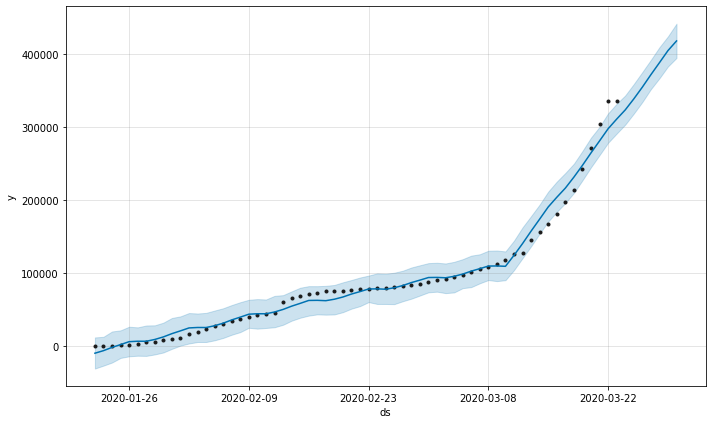

In [ ]:
confirmed_forecast_plot=model_confirmed.plot(forecast)

If you want to see the forecast components, you can use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

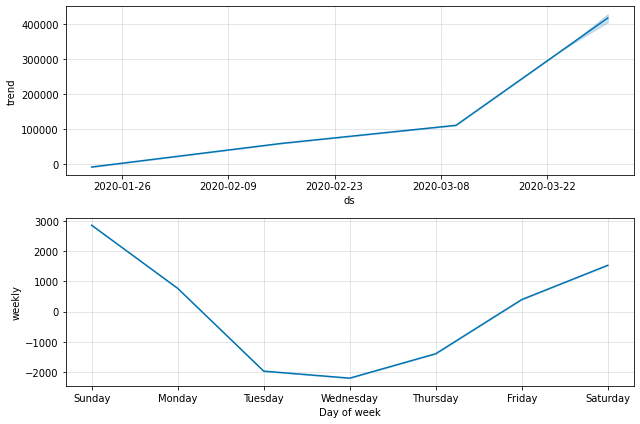

In [ ]:
confirmed_forecast_plot=model_confirmed.plot_components(forecast)

### Forecasting world wide deaths

In [ ]:
deaths.columns=['ds','y']  #renaming the columns to train for prophet.
deaths.tail()

,ds,y
57,2020-03-19,9867.0
58,2020-03-20,11299.0
59,2020-03-21,12973.0
60,2020-03-22,14632.0
61,2020-03-23,14643.0


In [ ]:
model_deaths=Prophet(interval_width=0.95)    #interval_width/confidence level=0.95
model_deaths.fit(deaths)
future=model_deaths.make_future_dataframe(periods=7)       #creating a new dataframe future with 7 additional columns which we want to predict the value for.
future.tail(10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
59,2020-03-21
60,2020-03-22
61,2020-03-23
62,2020-03-24
63,2020-03-25
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [ ]:
forecast=model_deaths.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(10)     #yhat is the predicted value, with a tolerance level(uncertainity of yhat_lower and yhat_upper).
#using tail cuz we want the predictions for the additionally added rows(7 rows in this case)

,ds,yhat,yhat_lower,yhat_upper
59,2020-03-21,11876.373177,10976.789009,12778.228856
60,2020-03-22,12700.973970,11773.930100,13687.342272
61,2020-03-23,13360.454764,12364.324099,14276.962733
62,2020-03-24,13962.267945,13028.238896,14837.423155
63,2020-03-25,14703.224417,13787.262804,15619.108415
64,2020-03-26,15411.877522,14463.032476,16333.669487
65,2020-03-27,16199.617603,15320.870291,17217.220763
66,2020-03-28,17006.904589,16088.571309,17986.971875
67,2020-03-29,17831.505383,16851.336017,18935.904220
68,2020-03-30,18490.986176,17542.674053,19512.687203


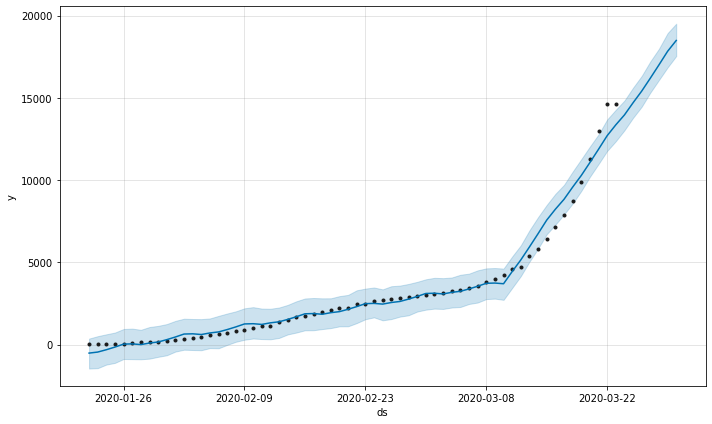

In [ ]:
deaths_forecast_plot=model_deaths.plot(forecast)

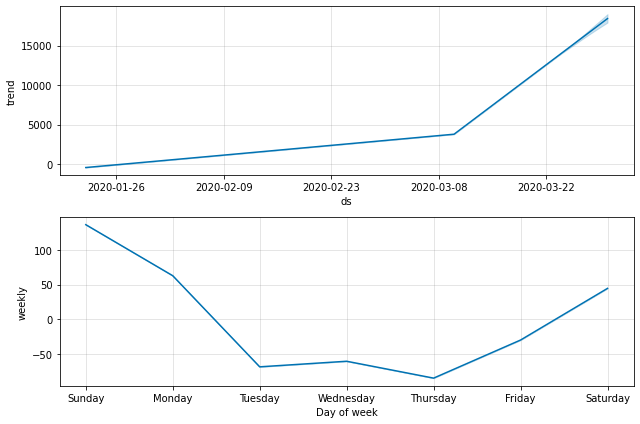

In [ ]:
deaths_forecast_plot=model_deaths.plot_components(forecast)

### Forecasting world wide recovered cases

In [ ]:
recovered.columns=['ds','y']  #renaming the columns to train for prophet.
recovered.tail()

,ds,y
57,2020-03-19,84854.0
58,2020-03-20,87256.0
59,2020-03-21,91499.0
60,2020-03-22,97704.0
61,2020-03-23,98334.0


In [ ]:
model_recovered=Prophet(interval_width=0.95)    #interval_width/confidence level=0.95
model_recovered.fit(recovered)
future=model_recovered.make_future_dataframe(periods=7)       #creating a new dataframe future with 7 additional columns which we want to predict the value for.
future.tail(10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
59,2020-03-21
60,2020-03-22
61,2020-03-23
62,2020-03-24
63,2020-03-25
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [ ]:
forecast=model_recovered.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(10)     #yhat is the predicted value, with a tolerance level(uncertainity of yhat_lower and yhat_upper).
#using tail cuz we want the predictions for the additionally added rows(7 rows in this case)

,ds,yhat,yhat_lower,yhat_upper
59,2020-03-21,91338.663665,89790.369706,92929.707606
60,2020-03-22,94201.648661,92438.832408,95859.310794
61,2020-03-23,96327.313922,94712.059734,97987.533203
62,2020-03-24,98403.145426,96706.992576,100010.147417
63,2020-03-25,100758.018619,99050.079651,102357.630777
64,2020-03-26,103001.349375,101264.828203,104868.442258
65,2020-03-27,105338.022248,103383.554053,107096.301074
66,2020-03-28,108256.307711,106052.733613,110346.696532
67,2020-03-29,111119.292707,108595.485969,113605.922912
68,2020-03-30,113244.957967,110203.927838,116168.170105


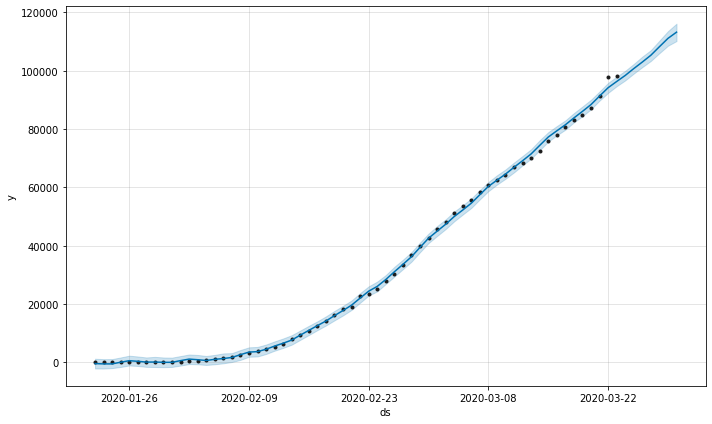

In [ ]:
recovered_forecast_plot=model_recovered.plot(forecast)

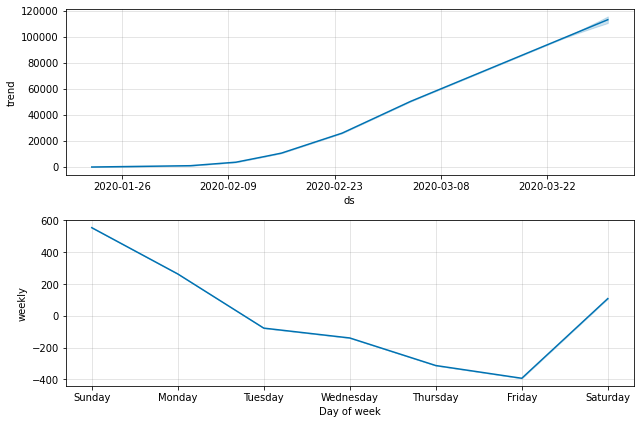

In [ ]:
recovered_forecast_plot=model_recovered.plot_components(forecast)